<a href="https://colab.research.google.com/github/chennurignaneshwar/Ecommerce/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install pyshark


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.1 MB/s eta 0:00:00


In [ ]:
import os

pcap_folder = '/content/drive/MyDrive/traffic/'  # <-- change this if needed
output_csv_path = '/content/drive/MyDrive/packet_features.csv'


In [ ]:
!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()


In [ ]:
!pip install nest_asyncio pyshark
import nest_asyncio
nest_asyncio.apply()

import pyshark
import pandas as pd
import os


In [ ]:
!apt-get update
!apt-get install -y tshark


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,788 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,243 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:13 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu j

In [ ]:
!which tshark
!tshark -v


/usr/bin/tshark
Running as user "root" and group "root". This could be dangerous.
TShark (Wireshark) 3.6.2 (Git v3.6.2 packaged as 3.6.2-2)

Copyright 1998-2022 Gerald Combs <gerald@wireshark.org> and contributors.
License GPLv2+: GNU GPL version 2 or later <https://www.gnu.org/licenses/gpl-2.0.html>
This is free software; see the source for copying conditions. There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

Compiled (64-bit) using GCC 11.2.0, with libpcap, with POSIX capabilities
(Linux), with libnl 3, with GLib 2.71.2, with zlib 1.2.11, with Lua 5.2.4, with
GnuTLS 3.7.3 and PKCS #11 support, with Gcrypt 1.9.4, with MIT Kerberos, with
MaxMind DB resolver, with nghttp2 1.43.0, with brotli, with LZ4, with Zstandard,
with Snappy, with libxml2 2.9.12, with libsmi 0.4.8.

Running on Linux 6.1.85+, with Intel(R) Xeon(R) CPU @ 2.00GHz (with SSE4.2),
with 12978 MB of physical memory, with GLib 2.72.4, with zlib 1.2.11, with
libpcap 1.10.1 (with TPACKET

In [ ]:
#✅ Step 2: Packet level future extraction
import pyshark
import pandas as pd
import os

def extract_features(pcap_path, max_packets=1000):
    cap = pyshark.FileCapture(pcap_path, only_summaries=False)
    data = []

    for i, packet in enumerate(cap):
        try:
            row = {
                'No': i,
                'Time': float(packet.sniff_time.timestamp()),
                'Source': packet.ip.src if hasattr(packet, 'ip') else None,
                'Destination': packet.ip.dst if hasattr(packet, 'ip') else None,
                'Protocol': packet.highest_layer,
                'Length': int(packet.length),
                'Info': str(packet.info) if hasattr(packet, 'info') else ''
            }
            if hasattr(packet, 'tcp'):
                row['SrcPort'] = packet.tcp.srcport
                row['DstPort'] = packet.tcp.dstport
                row['Flags'] = packet.tcp.flags
            elif hasattr(packet, 'udp'):
                row['SrcPort'] = packet.udp.srcport
                row['DstPort'] = packet.udp.dstport
                row['Flags'] = None
            else:
                row['SrcPort'] = None
                row['DstPort'] = None
                row['Flags'] = None

            data.append(row)
        except Exception as e:
            print(f"Error processing packet {i}: {e}")

        if i >= max_packets:
            break

    return pd.DataFrame(data)

# 🔄 Process all PCAP files and combine
all_data = []
for file in os.listdir(pcap_folder):
    if file.endswith('.pcap') or file.endswith('.pcapng'):
        print(f"Processing: {file}")
        df = extract_features(os.path.join(pcap_folder, file), max_packets=1000)
        df['Filename'] = file
        all_data.append(df)

# 🧾 Combine and save
packet_df = pd.concat(all_data, ignore_index=True)
packet_df.to_csv(output_csv_path, index=False)
print("✅ Packet features saved to:", output_csv_path)


Processing: IoT_Dataset_TCP_DDoS__00059_20180604173534.pcap
Processing: IoT_Dataset_TCP_DDoS__00060_20180604173550.pcap


/usr/local/lib/python3.11/dist-packages/pyshark/packet/fields.py:87: RuntimeWarning: coroutine 'Capture._get_tshark_process' was never awaited
  if hasattr(main_field, 'get_default_value'):


Processing: IoT_Dataset_TCP_DDoS__00026_20180604171349.pcap
Processing: IoT_Dataset_TCP_DDoS__00032_20180604171656.pcap
Processing: IoT_Dataset_TCP_DDoS__00030_20180604171605.pcap
Processing: IoT_Dataset_TCP_DDoS__00063_20180604173656.pcap
Processing: IoT_Dataset_TCP_DDoS__00018_20180604171001.pcap
Processing: IoT_Dataset_TCP_DDoS__00037_20180604171901.pcap
Processing: IoT_Dataset_TCP_DDoS__00062_20180604173639.pcap
Processing: IoT_Dataset_TCP_DDoS__00019_20180604171030.pcap
Processing: IoT_Dataset_UDP_DDoS__00009_20180604180420.pcap
Processing: IoT_Dataset_TCP_DDoS__00041_20180604172047.pcap
Processing: IoT_Dataset_TCP_DDoS__00046_20180604172255.pcap
Processing: IoT_Dataset_TCP_DDoS__00031_20180604171630.pcap
Processing: IoT_Dataset_TCP_DDoS__00047_20180604172318.pcap
Processing: IoT_Dataset_TCP_DDoS__00072_20180604174023.pcap
Processing: IoT_Dataset_TCP_DDoS__00044_20180604172205.pcap
Processing: IoT_Dataset_TCP_DDoS__00039_20180604171958.pcap
Processing: IoT_Dataset_TCP_DDoS__00038_

In [ ]:
#CONVERT PACKET DATA TO TIME SERIES FORMAT
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load CSV
df = pd.read_csv('/content/drive/MyDrive/packet_features.csv')

# Define columns
categorical_cols = ['Source', 'Destination', 'Protocol', 'Flags']
numeric_cols = ['Time', 'Length', 'SrcPort', 'DstPort']

# Fill missing values correctly
for col in categorical_cols:
    df[col] = df[col].fillna('missing').astype(str)

for col in numeric_cols:
    df[col] = df[col].fillna(0.0).astype(float)

# Encode categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Save filename column BEFORE dropping
file_col = df['Filename'] if 'Filename' in df.columns else None

# Drop extra columns
if 'Info' in df.columns:
    df.drop(['Info'], axis=1, inplace=True)
if 'Filename' in df.columns:
    df.drop(['Filename'], axis=1, inplace=True)

# Scale numeric features
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Convert to sequences
SEQUENCE_LENGTH = 50
sequences = []
labels = []

for start in range(0, len(df) - SEQUENCE_LENGTH, SEQUENCE_LENGTH):
    end = start + SEQUENCE_LENGTH
    chunk = df.iloc[start:end].values
    sequences.append(chunk)

    # Label based on filename
    if file_col is not None:
        current_filename = file_col.iloc[start]
        if any(keyword in current_filename for keyword in ['DDoS', 'DoS', 'PortScan']):
            labels.append(1)  # Attack
        else:
            labels.append(0)  # Normal
    else:
        labels.append(0)  # Default

X = np.array(sequences)
y = np.array(labels)

print("✅ Time-series shape:", X.shape)
print("✅ Label distribution:", np.unique(y, return_counts=True))


✅ Time-series shape: (1041, 50, 9)
✅ Label distribution: (array([0, 1]), array([ 60, 981]))


In [ ]:
#✅ Step 4: Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train distribution:", np.unique(y_train, return_counts=True))
print("y_test distribution:", np.unique(y_test, return_counts=True))


X_train: (832, 50, 9)
X_test: (209, 50, 9)
y_train distribution: (array([0, 1]), array([ 48, 784]))
y_test distribution: (array([0, 1]), array([ 12, 197]))


In [ ]:
#✅ Step 5: Build the LSTM Model to classify the binary labels
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,057 (82.25 KB)

 Trainable params: 21,057 (82.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#TRAIN THE MODEL:-
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights based on training labels
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

print("✅ Class Weights:", class_weights_dict)


# Train with class weights
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    class_weight=class_weights_dict,
                    verbose=1)


✅ Class Weights: {0: np.float64(8.666666666666666), 1: np.float64(0.5306122448979592)}
Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9121 - loss: 0.8717 - val_accuracy: 0.1675 - val_loss: 0.7752
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5206 - loss: 0.6531 - val_accuracy: 0.1627 - val_loss: 0.7424
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5721 - loss: 0.6810 - val_accuracy: 0.2057 - val_loss: 0.7462
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6067 - loss: 0.5897 - val_accuracy: 0.4163 - val_loss: 0.6933
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6966 - loss: 0.5788 - val_accuracy: 0.3589 - val_loss: 0.7479
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6333 - loss: 0.6146 - val_accuracy: 0.2823 - val_loss: 0.7901
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6597 - loss: 0.5574 - val_accuracy: 0.2632 - val_loss: 0.8215
Epoch 8/10
26/26 ━━━━━━━━━

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.42      0.53        12
           1       0.97      0.99      0.98       197

    accuracy                           0.96       209
   macro avg       0.84      0.70      0.75       209
weighted avg       0.95      0.96      0.95       209



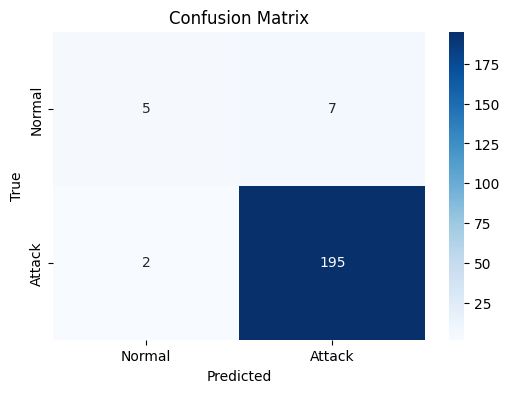

In [ ]:
#EVALUATING AND VISUALISING RESULTS
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


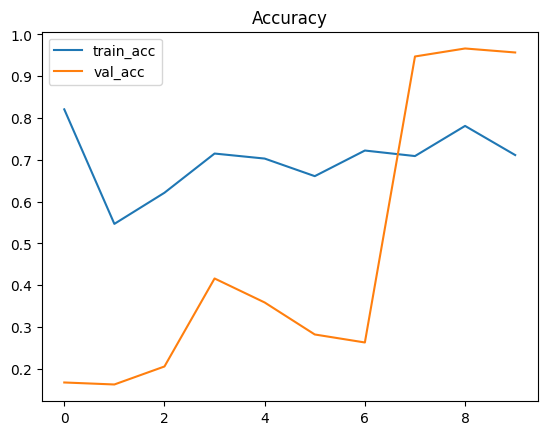

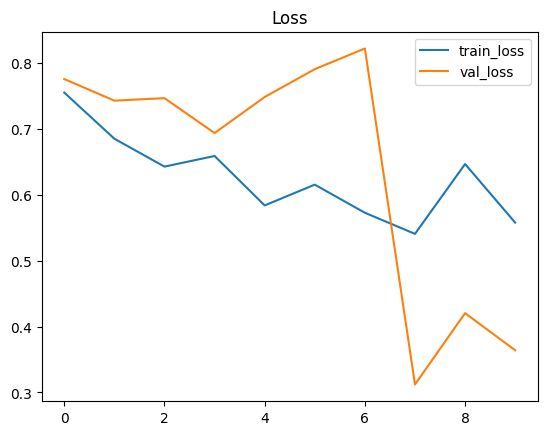

In [ ]:
#PLOT TRAINING HISTORY
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()
plt.show()


In [ ]:
#SAVE YOUR MODEL
model.save("rnn_intrusion_model.h5")


In [ ]:
#✅ Step 1: Extract & Process Features from the .pcap File
import pyshark
import pandas as pd

def extract_features_from_pcap(pcap_path, max_packets=5000):
    capture = pyshark.FileCapture(pcap_path, only_summaries=True)
    packets = []

    for i, pkt in enumerate(capture):
        if i >= max_packets:
            break
        packets.append({
            "Time": float(pkt.time),
            "Protocol": pkt.protocol,
            "Length": int(pkt.length),
            "Info": pkt.info,
            "Source": pkt.source if hasattr(pkt, 'source') else '0.0.0.0',
            "Destination": pkt.destination if hasattr(pkt, 'destination') else '0.0.0.0'
        })

    df = pd.DataFrame(packets)
    return df


In [ ]:
#✅ Step 2: Preprocess Just Like Training Data
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

def preprocess_df(df, label_encoders=None, scaler=None):
    # Fill missing values
    df = df.fillna({'Source': 'missing', 'Destination': 'missing', 'Protocol': 'missing', 'Info': 'missing'})
    df = df.fillna(0.0)

    categorical_cols = ['Source', 'Destination', 'Protocol']
    numeric_cols = ['Time', 'Length']

    # Encode categorical
    if not label_encoders:
        label_encoders = {}
        for col in categorical_cols:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le
    else:
        for col in categorical_cols:
            df[col] = label_encoders[col].transform(df[col].astype(str))

    # Normalize numeric
    if not scaler:
        scaler = StandardScaler()
        df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    else:
        df[numeric_cols] = scaler.transform(df[numeric_cols])

    return df, label_encoders, scaler


In [ ]:
#✅ Step 3: Segment into Sequences for the RNN
def create_sequences(df, sequence_length=50):
    sequences = []
    for start in range(0, len(df) - sequence_length, sequence_length):
        end = start + sequence_length
        chunk = df.iloc[start:end].values
        sequences.append(chunk)
    return np.array(sequences)


In [ ]:
from scapy.all import rdpcap, IP, TCP, UDP
import pandas as pd

def fast_extract_features_from_pcap(pcap_path, max_packets=5000):
    packets = rdpcap(pcap_path)[:max_packets]
    data = []

    for pkt in packets:
        if IP in pkt:
            src = pkt[IP].src
            dst = pkt[IP].dst
            proto = pkt[IP].proto
            length = len(pkt)
            time = pkt.time

            # Handle TCP/UDP ports
            sport = pkt[TCP].sport if TCP in pkt else pkt[UDP].sport if UDP in pkt else 0
            dport = pkt[TCP].dport if TCP in pkt else pkt[UDP].dport if UDP in pkt else 0
            flags = str(pkt[TCP].flags) if TCP in pkt else "None"

            data.append({
                'Source': src,
                'Destination': dst,
                'Protocol': str(proto),
                'Time': time,
                'Length': length,
                'SrcPort': sport,
                'DstPort': dport,
                'Flags': flags
            })

    return pd.DataFrame(data)


In [ ]:
# ✅ Step 4: Load the model and predict safely
from tensorflow.keras.models import load_model
import numpy as np

# Load trained RNN model
model = load_model('/content/rnn_intrusion_model.h5')

# Step 1: Fast feature extraction
df_raw = fast_extract_features_from_pcap('/content/drive/MyDrive/traffic/p.pcap', max_packets=2000)

# Step 2: Preprocess
df_processed, label_encoders, scaler = preprocess_df(df_raw)

# ✅ Ensure all columns are numeric
df_processed = df_processed.select_dtypes(include=[np.number])

# ✅ Drop any rows with NaN or empty values (safety check)
df_processed = df_processed.replace('', np.nan)
df_processed = df_processed.dropna()

# Step 3: Create sequences
X_sequences = create_sequences(df_processed)

# ✅ Final conversion to float32 for model prediction
X_sequences = np.array(X_sequences).astype(np.float32)

# Step 4: Predict
predictions = model.predict(X_sequences, verbose=1)
labels = (predictions > 0.5).astype(int)

print("🔍 Sample predictions (first 10):", labels[:10].flatten())


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
🔍 Sample predictions (first 10): [0 0 0 0 0 0 0 0 0 0]


In [ ]:
#To Extract Hacker Details
# Helper function to map sequence indices back to original packet indices
def map_sequences_back_to_indices(df, sequence_length=50):
    return [range(i, i + sequence_length) for i in range(len(df) - sequence_length + 1)]

# 🔄 Step 1: Reload raw packets (original feature-extracted)
df_raw = fast_extract_features_from_pcap('/content/drive/MyDrive/traffic/p.pcap', max_packets=2000)

# 🔗 Step 2: Re-map sequence predictions to original packets
sequence_indices = map_sequences_back_to_indices(df_raw, sequence_length=50)

# ✅ Step 3: Identify indices of sequences labeled as attacks
attack_sequences = [sequence_indices[i] for i, label in enumerate(labels) if label == 1]

# 📍 Flatten & deduplicate indices of packets involved in attack-labeled sequences
attack_packet_indices = sorted(set(i for seq in attack_sequences for i in seq))

# 🧹 Step 4: Extract suspected hacker packet info
df_hacker_packets = df_raw.iloc[attack_packet_indices]

# 🛡️ Step 5: Display key details of suspected attack packets
print("🛡️ Potential Hacker Packets Found:", len(df_hacker_packets))
df_hacker_packets[['Source', 'Destination', 'SrcPort', 'DstPort', 'Protocol', 'Length', 'Flags']].head(10)


🛡️ Potential Hacker Packets Found: 56


,Source,Destination,SrcPort,DstPort,Protocol,Length,Flags
17,192.168.100.6,192.168.100.3,80,80,6,296,
18,192.168.100.3,192.168.100.55,80,8080,6,1357,
19,192.168.100.5,192.168.100.46,80,3456,17,1001,None
20,192.168.100.46,192.168.100.5,80,80,6,1436,
21,192.168.100.7,192.168.100.3,365,565,17,60,None
22,192.168.100.46,192.168.100.5,3456,80,17,1123,None
23,192.168.100.55,192.168.100.3,8080,80,6,867,
24,192.168.100.46,192.168.100.5,80,80,17,709,None
25,192.168.100.3,192.168.100.55,80,8080,6,899,
26,192.168.100.5,192.168.100.46,80,3456,17,616,None


In [ ]:
#1. 🧠 Analyze Top Suspicious IPs
# Count frequency of source IPs in attacks
top_sources = df_hacker_packets['Source'].value_counts().head(5)
print("🔝 Top Suspicious Source IPs:\n", top_sources)


🔝 Top Suspicious Source IPs:
 Source
192.168.100.46    22
192.168.100.5     12
192.168.100.3      8
192.168.100.55     7
192.168.100.7      4
Name: count, dtype: int64


In [ ]:
#2. 💾 Optional: Save the Hacker Logs
df_hacker_packets.to_csv('/content/drive/MyDrive/hacker_logs.csv', index=False)
print("✅ Hacker details saved to hacker_logs.csv")


✅ Hacker details saved to hacker_logs.csv
